In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_digits, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import sys
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv("spg.csv")
# df.shape()

In [ ]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [ ]:
df.shape

(4213, 21)

In [ ]:
df_corr = np.abs(df.corr()['generated_power_kw'][:-1]).sort_values(ascending=False)
df_corr

zenith                               0.649991
angle_of_incidence                   0.646537
shortwave_radiation_backwards_sfc    0.556148
relative_humidity_2_m_above_gnd      0.336783
total_cloud_cover_sfc                0.334338
low_cloud_cover_low_cld_lay          0.288066
medium_cloud_cover_mid_cld_lay       0.227834
temperature_2_m_above_gnd            0.217280
wind_speed_80_m_above_gnd            0.157899
mean_sea_level_pressure_MSL          0.150551
high_cloud_cover_high_cld_lay        0.147723
wind_gust_10_m_above_gnd             0.122808
total_precipitation_sfc              0.118442
wind_speed_900_mb                    0.107615
wind_speed_10_m_above_gnd            0.083043
wind_direction_900_mb                0.077435
wind_direction_10_m_above_gnd        0.073257
wind_direction_80_m_above_gnd        0.069941
azimuth                              0.061184
snowfall_amount_sfc                  0.049508
Name: generated_power_kw, dtype: float64

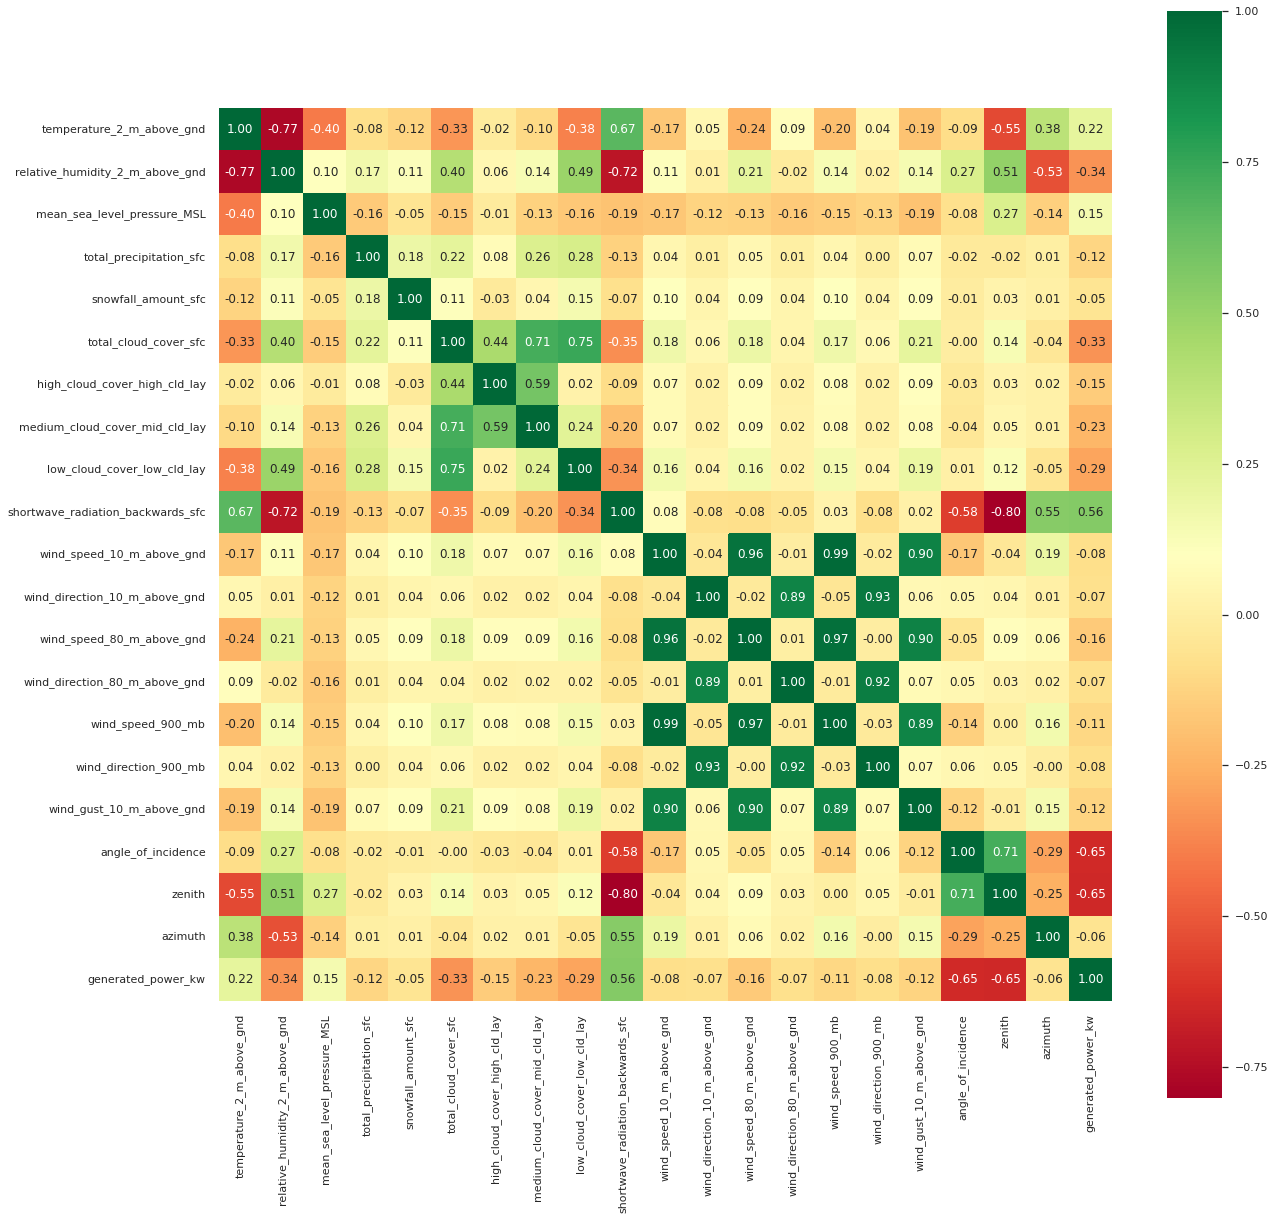

In [ ]:
import seaborn as sns
col = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw']
corr = df[col].corr()
plt.figure(figsize = (20,20))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)


0.8020750990472814

In [ ]:
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)
print("MAE: %.5f" % sqrt(mean_absolute_error(y_test, reg.predict(X_test))))
print("RMSE: %.5f" % sqrt(mean_squared_error(y_test, reg.predict(X_test))))



MAE: 16.93794
RMSE: 425.20257


# M.L (LINEAR)

In [ ]:
x1=df[["zenith"]]
y1=df[["generated_power_kw"]]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x1_train, y1_train)
regressor.predict(x1_test)

print("Coeff: %0.5f" % regressor.coef_)
print("Intercept: %0.5f" % regressor.intercept_)
print("R2 score : %.5f" % r2_score(y1_test, regressor.predict(x1_test)))
print("MSE: %.5f" % mean_squared_error(y1_test, regressor.predict(x1_test)))
print("RMSE: %.5f" % sqrt(mean_squared_error(y1_test, regressor.predict(x1_test))))
print("MAE: %.5f" % sqrt(mean_absolute_error(y1_test, regressor.predict(x1_test))))

Coeff: -30.36310
Intercept: 2956.37378
R2 score : 0.44350
MSE: 508346.20088
RMSE: 712.98401
MAE: 24.00261


In [ ]:
x1=df[["angle_of_incidence"]]
y1=df[["generated_power_kw"]]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x1_train, y1_train)
regressor.predict(x1_test)

print("Coeff: %0.5f" % regressor.coef_)
print("Intercept: %0.5f" % regressor.intercept_)
print("R2 score : %.5f" % r2_score(y1_test, regressor.predict(x1_test)))
print("MSE: %.5f" % mean_squared_error(y1_test, regressor.predict(x1_test)))
print("RMSE: %.5f" % sqrt(mean_squared_error(y1_test, regressor.predict(x1_test))))
print("MAE: %.5f" % sqrt(mean_absolute_error(y1_test, regressor.predict(x1_test))))

Coeff: -22.61140
Intercept: 2287.53174
R2 score : 0.42476
MSE: 525457.43852
RMSE: 724.88443
MAE: 24.95664


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.7915768125058504

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
rf_reg = GradientBoostingRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.8016031833036309

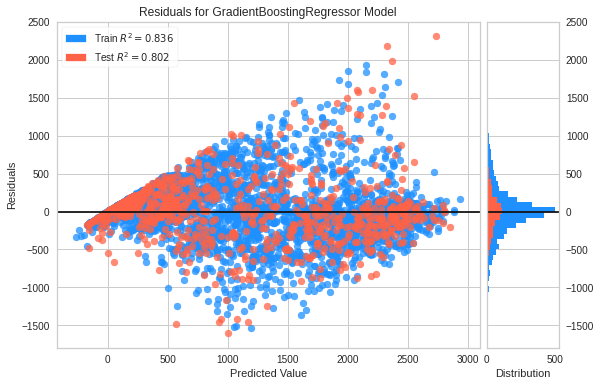

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

viz = ResidualsPlot(GradientBoostingRegressor(random_state=42),
                    train_color="dodgerblue",
                    test_color="tomato",
                    fig=plt.figure(figsize=(9,6))
                    )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

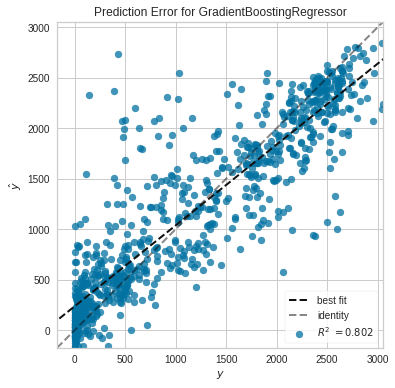

In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import GradientBoostingRegressor

viz = PredictionError(GradientBoostingRegressor(random_state=42),
                      fig=plt.figure(figsize=(6,6))
                      )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
zenith                               0.649991
angle_of_incidence                   0.646537
shortwave_radiation_backwards_sfc    0.556148
relative_humidity_2_m_above_gnd      0.336783
total_cloud_cover_sfc                0.334338
low_cloud_cover_low_cld_lay          0.288066
medium_cloud_cover_mid_cld_lay       0.227834
temperature_2_m_above_gnd            0.217280

# M.L (MULTIPLE REGRESSION)

In [ ]:
# multiple regression
from sklearn.linear_model import LinearRegression
X1=['generated_power_kw']
Y1=['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd','total_cloud_cover_sfc', 'medium_cloud_cover_mid_cld_lay','low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc', 'angle_of_incidence', 'zenith']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
 

regressor = LinearRegression()
regressor.fit(X1_train, Y1_train)
regressor.predict(X1_test)


#print("Intercept: %0.5f" % regressor.intercept_)
print("R2 score : %.5f" % r2_score(Y1_test, regressor.predict(X1_test)))
#print("MSE: %.5f" % mean_squared_error(y_test, regressor.predict(X_test)))
#print("RMSE: %.5f" % sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
#print("MAE: %.5f" % sqrt(mean_absolute_error(y_test, regressor.predict(X_test))))

ValueError: ignored

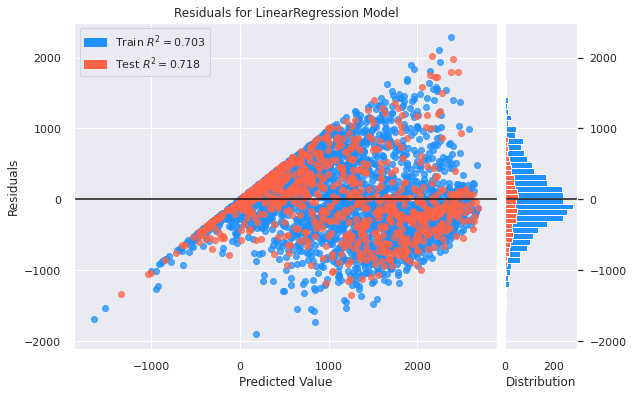

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

viz = ResidualsPlot(LinearRegression(),
                    train_color="dodgerblue",
                    test_color="tomato",
                    fig=plt.figure(figsize=(9,6))
                    )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

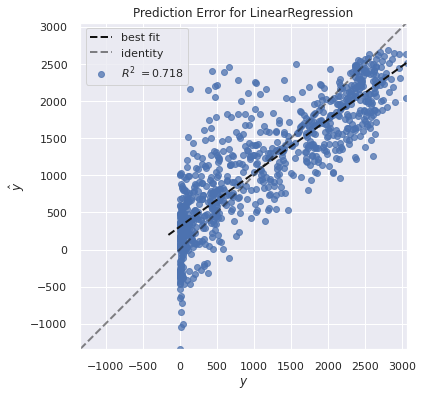

In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import GradientBoostingRegressor

viz = PredictionError(LinearRegression(),
                      fig=plt.figure(figsize=(6,6))
                      )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# M.L POLYNOMIAL REGG

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1], df.iloc[:,-1],test_size=0.5,random_state=0)
#DEGREE 4
from sklearn.preprocessing import PolynomialFeatures
polynom=PolynomialFeatures(degree=4)
X_polynom=polynom.fit_transform(X_train)
X_polynom

array([[1.00000000e+00, 5.94000000e+00, 8.90000000e+01, ...,
        3.87173546e+07, 2.55326585e+07, 1.68378407e+07],
       [1.00000000e+00, 2.97500000e+01, 1.40000000e+01, ...,
        4.70840127e+08, 1.71829318e+09, 6.27077280e+09],
       [1.00000000e+00, 1.18900000e+01, 7.30000000e+01, ...,
        4.11345055e+07, 5.47136958e+07, 7.27756045e+07],
       ...,
       [1.00000000e+00, 2.53100000e+01, 2.30000000e+01, ...,
        1.31048901e+07, 5.47358871e+07, 2.28618273e+08],
       [1.00000000e+00, 2.94600000e+01, 1.10000000e+01, ...,
        1.88637179e+07, 6.91126562e+07, 2.53214095e+08],
       [1.00000000e+00, 2.46600000e+01, 3.70000000e+01, ...,
        8.29606193e+07, 5.02243939e+08, 3.04058693e+09]])

In [ ]:
PolyRegr=LinearRegression()
PolyRegr.fit(X_polynom,y_train)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

print(PolyRegr.coef_)
print("Intercept: %0.6f" % PolyRegr.intercept_)
print("R2 score : %.6f" % r2_score(y_test, PolyRegr.predict(polynom.fit_transform(X_test))))
print("MSE: %.6f" % mean_squared_error(y_test, PolyRegr.predict(polynom.fit_transform(X_test))))
print("RMSE: %.6f" % sqrt(mean_squared_error(y_test, PolyRegr.predict(polynom.fit_transform(X_test)))))
print("MAE: %.6f" % sqrt(mean_absolute_error(y_test, PolyRegr.predict(polynom.fit_transform(X_test)))))



[-2.56431367e-07  1.90651975e-06 -5.58502073e-07 ...  1.05013978e-04
 -5.40295141e-04 -1.02163990e-04]
Intercept: 196878.320605
R2 score : -18254.157330
MSE: 16210764976.607790
RMSE: 127321.502413
MAE: 128.569256


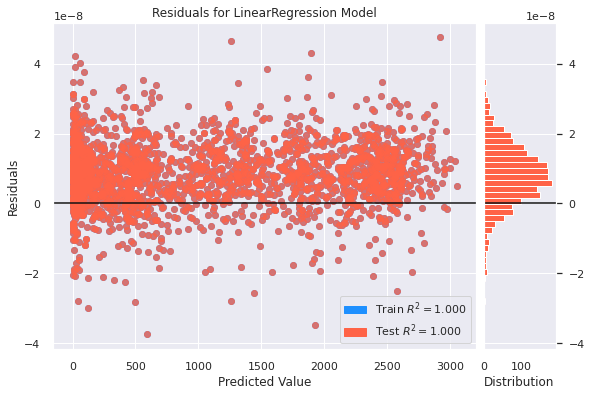

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

viz = ResidualsPlot(LinearRegression(),
                    train_color="dodgerblue",
                    test_color="tomato",
                    fig=plt.figure(figsize=(9,6))
                    )

viz.fit(X_polynom,y_train)
viz.score(X_polynom,y_train)
viz.show();

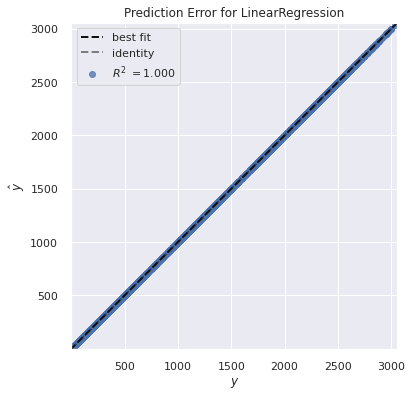

In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import GradientBoostingRegressor

viz = PredictionError(LinearRegression(),
                      fig=plt.figure(figsize=(6,6))
                      )

viz.fit(X_polynom,y_train)
viz.score(X_polynom,y_train)
viz.show();

#M.L LASSO

In [ ]:
model=Lasso(alpha=6.0)
model.fit(X_train, y_train)
model.predict(X_test)
print("intercept: %.6f" %model.intercept_)
print("R2 score : %.6f" % r2_score((y_train),(model.predict(X_train))))
print("MSE: %.6f" % mean_squared_error((y_train),(model.predict(X_train))))
print("MAE: %.6f" % mean_absolute_error((y_train),(model.predict(X_train))))
print("RMSE: %.6f" % mean_squared_error((y_train),(model.predict(X_train)),squared=False))

intercept: -12542.420642
R2 score : 0.702601
MSE: 259047.505416
MAE: 392.717454
RMSE: 508.967097


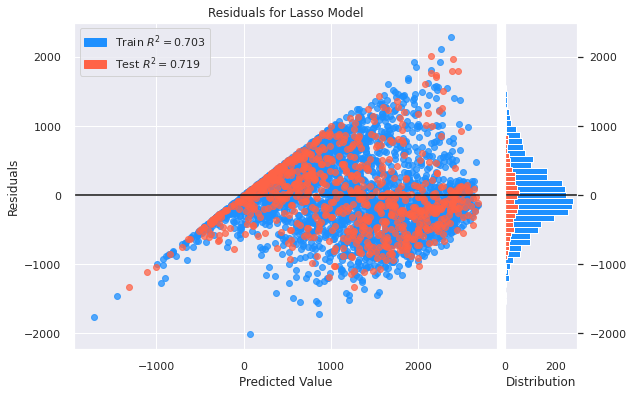

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

viz = ResidualsPlot(Lasso(alpha=6.0),
                    train_color="dodgerblue",
                    test_color="tomato",
                    fig=plt.figure(figsize=(9,6))
                    )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

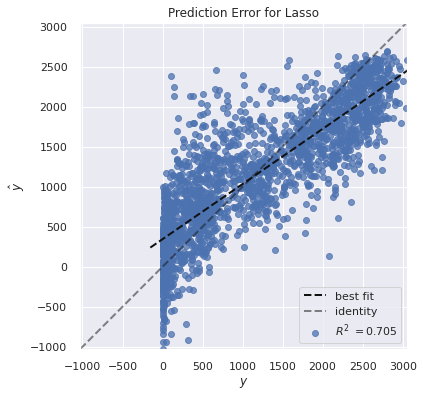

In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import GradientBoostingRegressor

viz = PredictionError(Lasso(alpha=1.0),
                      fig=plt.figure(figsize=(6,6))
                      )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# M.L (RIDGE)

In [ ]:
model=Ridge(alpha=1.0)
model.fit(X_train, y_train)
model.predict(X_test)
print("intercept: %.6f" %model.intercept_)
print("R2 score : %.6f" % r2_score((y_train),(model.predict(X_train))))
print("MSE: %.6f" % mean_squared_error((y_train),(model.predict(X_train))))
print("MAE: %.6f" % mean_absolute_error((y_train),(model.predict(X_train))))
print("RMSE: %.6f" % mean_squared_error((y_train),(model.predict(X_train)),squared=False))

intercept: -11662.982886
R2 score : 0.705988
MSE: 255893.148566
MAE: 389.429524
RMSE: 505.858823


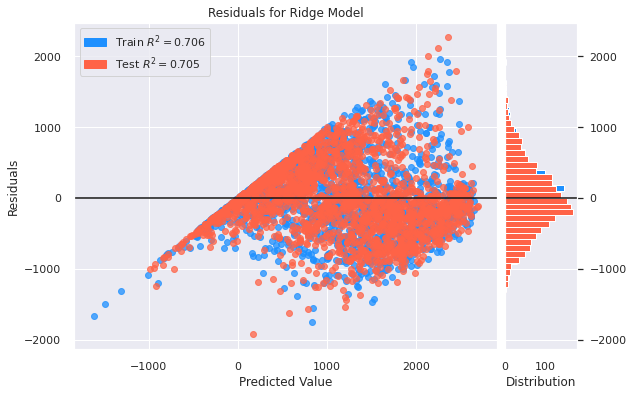

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

viz = ResidualsPlot(Ridge(alpha=1.0),
                    train_color="dodgerblue",
                    test_color="tomato",
                    fig=plt.figure(figsize=(9,6))
                    )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

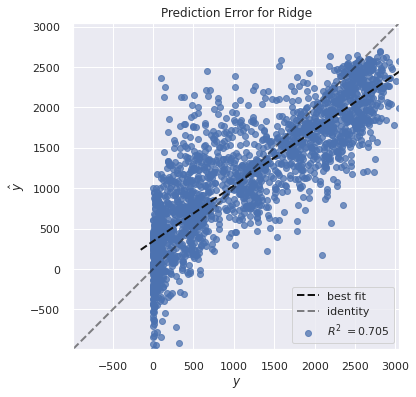

In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import GradientBoostingRegressor

viz = PredictionError(Ridge(alpha=1.0),
                      fig=plt.figure(figsize=(6,6))
                      )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#SVM ALGO


In [ ]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, y_train)
svm_reg.predict(X_test)
print("R2 score : %.6f" % r2_score((y_train),svm_reg.predict((X_train))))





R2 score : 0.604512


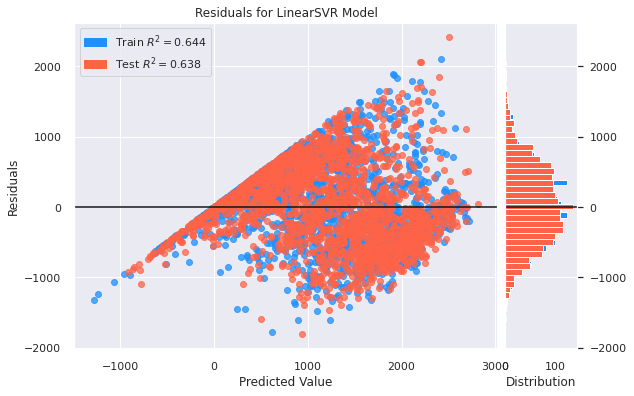

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

viz = ResidualsPlot(LinearSVR(epsilon=1.5),
                    train_color="dodgerblue",
                    test_color="tomato",
                    fig=plt.figure(figsize=(9,6))
                    )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

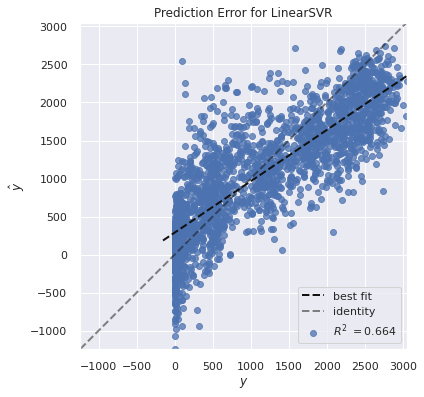

In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import GradientBoostingRegressor

viz = PredictionError(LinearSVR(epsilon=1.5),
                      fig=plt.figure(figsize=(6,6))
                      )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#KNN ALGO

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
print(model)

KNeighborsRegressor(n_neighbors=4)


In [ ]:
model.fit(X_train,y_train)
pred_knn = model.predict(X_test)

In [ ]:
r2_score=model.score(X_test,y_test)
print(r2_score)

0.6703410002919371


In [ ]:
from sklearn.metrics import mean_squared_error
mse =mean_squared_error(y_test,pred_knn )
print("Mean Squared Error:",mse)

Mean Squared Error: 292740.53737872996


In [ ]:
import math
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 541.0550225057799


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(0,10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 613.5672980462521
RMSE value for k=  2 is: 529.2297740848015
RMSE value for k=  3 is: 514.5742942387714
RMSE value for k=  4 is: 498.6879429609854
RMSE value for k=  5 is: 500.9112433064341
RMSE value for k=  6 is: 500.9403437400639
RMSE value for k=  7 is: 501.7339763480543
RMSE value for k=  8 is: 501.15100974659856
RMSE value for k=  9 is: 501.1941089263996
RMSE value for k=  10 is: 499.69684762153935


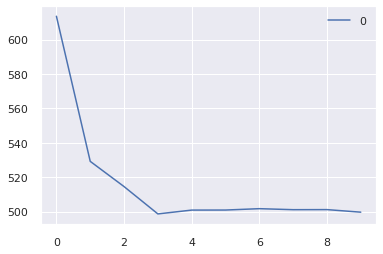

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=2)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 7}

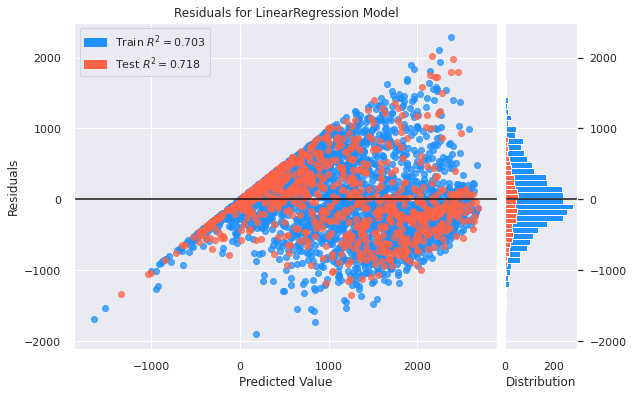

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

viz = ResidualsPlot(LinearRegression(),
                    train_color="dodgerblue",
                    test_color="tomato",
                    fig=plt.figure(figsize=(9,6))
                    )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

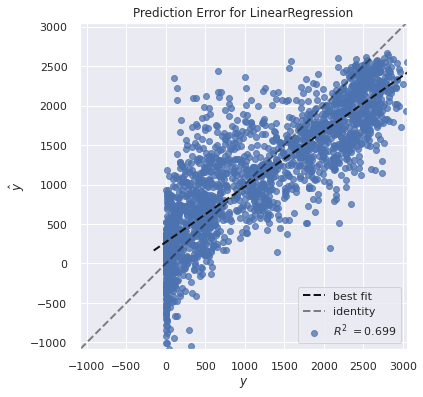

In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import GradientBoostingRegressor

viz = PredictionError(LinearRegression(),
                      fig=plt.figure(figsize=(6,6))
                      )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#DECISION TREE REGRESSOR

In [ ]:
from sklearn import tree
n_samples = 4213 # Number of samples
n_features = 20 # Number of features
n_informative = 20 # Number of informative features i.e. actual features which influence the output


In [ ]:
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

Relative importance of the features:  [0.         0.02556003 0.00379639 0.         0.         0.1879547
 0.00214124 0.         0.         0.07381685 0.         0.
 0.         0.         0.0007778  0.         0.0034767  0.49806799
 0.09865376 0.10575453]


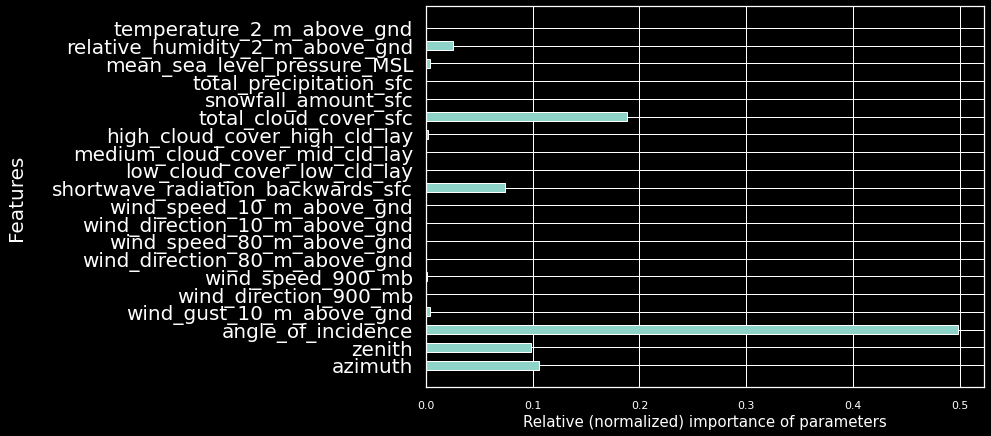

In [ ]:
print("Relative importance of the features: ",tree_model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=tree_model.feature_importances_,height=0.5)

In [ ]:
print("Regression coefficient:",tree_model.score(X_train,y_train))

Regression coefficient: 0.7640963422242314


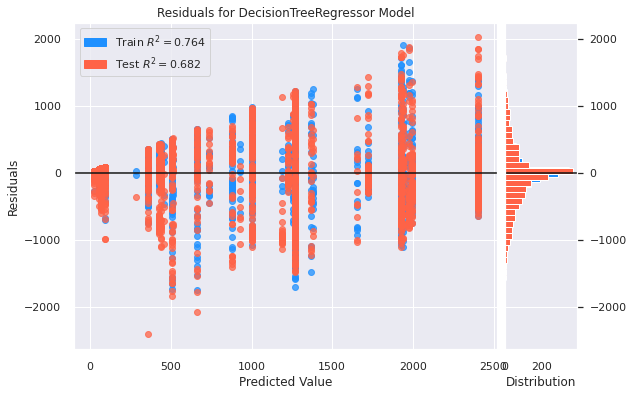

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

viz = ResidualsPlot(tree.DecisionTreeRegressor(max_depth=5,random_state=None),
                    train_color="dodgerblue",
                    test_color="tomato",
                    fig=plt.figure(figsize=(9,6))
                    )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

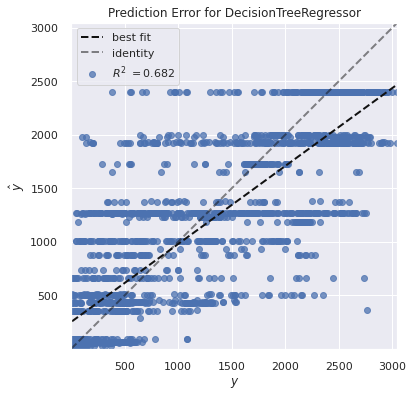

In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import GradientBoostingRegressor

viz = PredictionError(tree.DecisionTreeRegressor(max_depth=5,random_state=None),
                      fig=plt.figure(figsize=(6,6))
                      )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_samples = 4213 # Number of samples
n_features = 20 # Number of features
n_informative = 20 # Number of informative features i.e. actual features which influence the output

In [ ]:
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_leaf_nodes=5)

Relative importance of the features:  [0.         0.00050512 0.         0.         0.         0.20212612
 0.         0.         0.         0.00287323 0.         0.
 0.         0.         0.         0.         0.         0.38622172
 0.37683767 0.03143614]


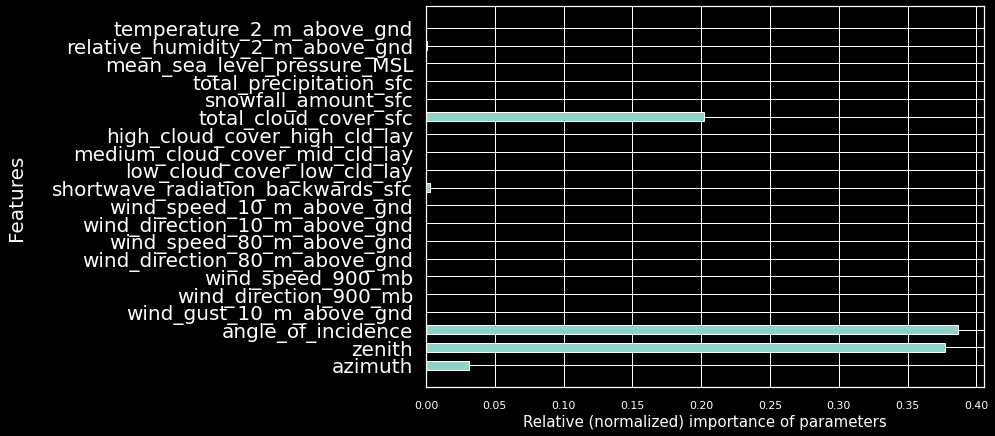

In [ ]:
print("Relative importance of the features: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=model.feature_importances_,height=0.5)

In [ ]:
print("Regression coefficient:",model.score(X_train,y_train))

Regression coefficient: 0.6252977143181272


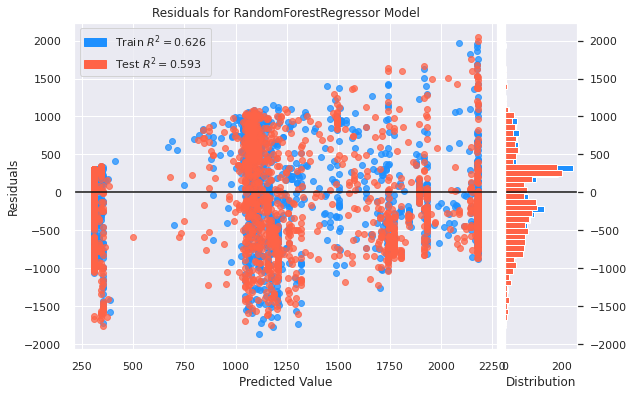

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

viz = ResidualsPlot(RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100),
                    train_color="dodgerblue",
                    test_color="tomato",
                    fig=plt.figure(figsize=(9,6))
                    )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

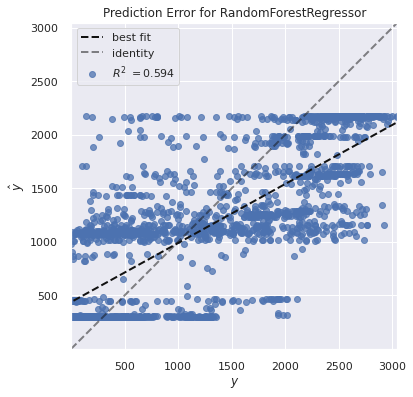

In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import GradientBoostingRegressor

viz = PredictionError(RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100),
                      fig=plt.figure(figsize=(6,6))
                      )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
lr_probas = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)
rf_probas = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)
gb_probas = GradientBoostingClassifier().fit(X_train, y_train).predict_proba(X_test)
et_scores = ExtraTreesClassifier().fit(X_train, y_train).predict_proba(X_test)

probas_list = [lr_probas, rf_probas, gb_probas, et_scores]
clf_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Extra Trees Classifier']

#Deep Learning

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
model = keras.Sequential()
model.add(Dense(20, activation='relu', input_shape=(3,)))
model.add(Dense(1))
#
model.compile(optimizer= 'adam', loss='mse', metrics=['mse'])
history = model.fit(X_train,y_train, epochs=20, verbose=0)


ValueError: ignored

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x3_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x3_train.shape[1], activation='relu'))

In [ ]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [ ]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [ ]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:

NN_model.fit(x3_train, y3 , epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
wights_file = 'Weights-001--824.77032.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
x3_train

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score
import matplotlib.pyplot as plt


x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(3,)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss=" r2_score", optimizer="adam")
model.summary()
model.fit(x3_train, y3_train, batch_size=24,epochs=200, verbose=0)

ypred = model.predict(x3_test)
print(model.evaluate(x3_train, y3_train))
print(" r2_score: %.6f" %  r2_score(y3_test, ypred))

x_ax = range(len(ypred))
plt.scatter(x_ax, y3_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
NN_model = Sequential()

In [ ]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df.shape[1], activation='relu'))

In [ ]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [ ]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [ ]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
target=df["generated_power_kw"]

In [ ]:
NN_model.fit(x1_train,target , epochs=500, batch_size=32, validation_split = 0.3, callbacks=callbacks_list)

In [ ]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import random
import ml_helpers


In [ ]:
clf = MLPRegressor(solver='sgd', learning_rate_init=0.0001, momentum=0.9, early_stopping=False, learning_rate='constant', hidden_layer_sizes=(15, 10, 5), max_iter=500, verbose=True)

In [ ]:
X_train, y_train = ml_helpers.shuffle_data(X_train, y_train)

In [ ]:
from neupy import algorithms

In [ ]:
nw = algorithms.GRNN(std=0.1, verbose=False)
nw.train(X_train, y_train)

y_predicted = nw.predict(X_test)

In [ ]:

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
...
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K

In [ ]:
batch_size = 150
epochs =100
# input image dimensions
img_rows, img_cols = 28, 13
#inputshape = X.shape[1]

In [ ]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [ ]:
pip install pixellib

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Concatenate, LeakyReLU, BatchNormalization, concatenate


model = Sequential()
#model.add(Dense(256, activation='relu', input_dim=366))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = [len(X_train[0])]))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), init='uniform'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                 )

model.summary()

In [ ]:
pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib

In [ ]:
pip install pixellib

In [ ]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
#model.add(Dense(256, activation='relu', input_dim=366))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), init='uniform'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                 )

model.summary()

In [ ]:
pip install keras.Normalization

In [ ]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
#model.add(Dense(256, activation='relu', input_dim=366))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), init='uniform'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                 )

model.summary()

In [ ]:
model.fit(X_train, y_train,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
X_test


In [ ]:
y_test


In [ ]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)


##CNN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K

In [ ]:
batch_size = 150
epochs =100
# input image dimensions
# img_rows, img_cols = 28, 13
#inputshape = X.shape[1]

In [ ]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.values.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.values.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(28,13))

In [ ]:
from tensorflow.keras.layers import Dense, BatchNormalization

model = Sequential()
#model.add(Dense(256, activation='relu', input_dim=366))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), init='uniform'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                 )

model.summary()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from keras.layers.normalization import BatchNormalization

##ANN

In [ ]:
TargetVariable=['generated_power_kw']
Predictors=['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth']
 
X=df[Predictors].values
y=df[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2949, 20)
(2949, 1)
(1264, 20)
(1264, 1)


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 7.7 MB/s 


In [ ]:
pip install keras


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=20,kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 5000, verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
148/148 [==============================] - 1s 3ms/step - loss: 0.1843
Epoch 2502/5000
148/148 [==============================] - 0s 3ms/step - loss: 0.1837
Epoch 2503/5000
148/148 [==============================] - 0s 3ms/step - loss: 0.1843
Epoch 2504/5000
148/148 [==============================] - 1s 3ms/step - loss: 0.1837
Epoch 2505/5000
148/148 [==============================] - 0s 3ms/step - loss: 0.1846
Epoch 2506/5000
148/148 [==============================] - 0s 3ms/step - loss: 0.1836
Epoch 2507/5000
148/148 [==============================] - 0s 3ms/step - loss: 0.1838
Epoch 2508/5000
148/148 [==============================] - 0s 3ms/step - loss: 0.1840
Epoch 2509/5000
148/148 [==============================] - 0s 3ms/step - loss: 0.1836
Epoch 2510/5000
148/148 [==============================] - 0s 3ms/step - loss: 0.1844
Epoch 2511/5000
148/148 [==============================] - 1s 3ms/step - loss: 0.1839
Epo

In [ ]:

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 167,553
Trainable params: 167,553
Non-trainable params: 0
_________________________________________________________________


In [ ]:

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/500
84/85 [============================>.] - ETA: 0s - loss: 703.2352 - mean_absolute_error: 703.2352
Epoch 1: val_loss improved from inf to 584.23486, saving model to Weights-001--584.23486.hdf5
85/85 [==============================] - 2s 8ms/step - loss: 702.0111 - mean_absolute_error: 702.0111 - val_loss: 584.2349 - val_mean_absolute_error: 584.2349
Epoch 2/500
75/85 [=========================>....] - ETA: 0s - loss: 468.4655 - mean_absolute_error: 468.4655
Epoch 2: val_loss improved from 584.23486 to 379.06570, saving model to Weights-002--379.06570.hdf5
85/85 [==============================] - 1s 6ms/step - loss: 460.9162 - mean_absolute_error: 460.9162 - val_loss: 379.0657 - val_mean_absolute_error: 379.0657
Epoch 3/500
82/85 [===========================>..] - ETA: 0s - loss: 393.1768 - mean_absolute_error: 393.1768
Epoch 3: val_loss improved from 379.06570 to 358.72067, saving model to Weights-003--358.72067.hdf5
85/85 [==============================] - 0s 6ms/step - los

In [ ]:
pred = NN_model.predict(X_test)
print("R2 score : %.5f" % r2_score(y_test, pred))


R2 score : 0.73635


TypeError: ignored

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,7), kind='line')

NameError: ignored

In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import GradientBoostingRegressor

viz = PredictionError(NN_model(),
                      fig=plt.figure(figsize=(6,6))
                      )

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

ValueError: ignored